# Cargar paquetes


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Cargar bases de datos

In [12]:
df = pd.read_excel("bbdd/MigrantesChile (2005-2016).xlsx")

def glimpse(df):
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
    print(df.dtypes)
    print("\nPrimeras 5 filas:")
    print(df.head())

# Usar la función con tu DataFrame
glimpse(df)

list(df.columns)

df2 = pd.read_csv("bbdd/gapminderData2.csv")

def glimpse(df2):
    print(f"Filas: {df2.shape[0]}, Columnas: {df2.shape[1]}\n")
    print(df2.dtypes)
    print("\nPrimeras 5 filas:")
    print(df2.head())

# Usar la función con tu DataFrame
glimpse(df2)

import requests

url = "https://gist.githubusercontent.com/jsdario/1daee22f3f13fe6bc6a343f829565759/raw/3511dc6de6a7bf064c168b4f20b85a20d8f83b91/funes_el_memorioso.txt"
response = requests.get(url)

# Verificamos que la petición fue exitosa
if response.status_code == 200:
    texto = response.text
    print(texto[:500])  # Mostrar los primeros 500 caracteres
else:
    print("Error al descargar el archivo:", response.status_code)

Filas: 177, Columnas: 16

ID Continent     int64
Continent       object
ID Country       int64
Country         object
2005             int64
2006             int64
2007             int64
2008             int64
2009             int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
2016             int64
dtype: object

Primeras 5 filas:
   ID Continent Continent  ID Country      Country  2005  2006  2007  2008  \
0           142      Asia         308  Afghanistan     8     4     5     1   
1           150    Europe         518      Albania     2     1     1     2   
2           150    Europe         563      Germany   495   481   562   614   
3           150    Europe         525      Andorra     2     1     1     1   
4             2    Africa         140       Angola     1     2     4     3   

   2009  2010  2011  2012  2013  2014  2015  2016  
0     2     1     3     6    15     4    12    15  


# Pregunta N°1

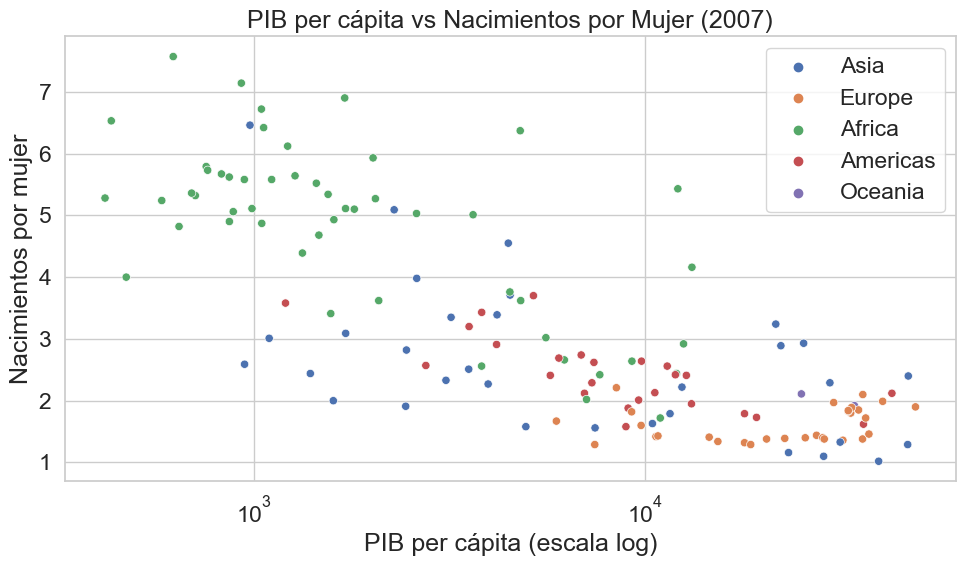

In [13]:

df_2007 = df2[df2['year'] == 2007]

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_2007, x="gdpPercap", y="bornPerwom", hue="continent")
plt.title("PIB per cápita vs Nacimientos por Mujer (2007)")
plt.xscale("log")
plt.xlabel("PIB per cápita (escala log)")
plt.ylabel("Nacimientos por mujer")
plt.legend()
plt.tight_layout()
plt.show()


# Pregunta N°2

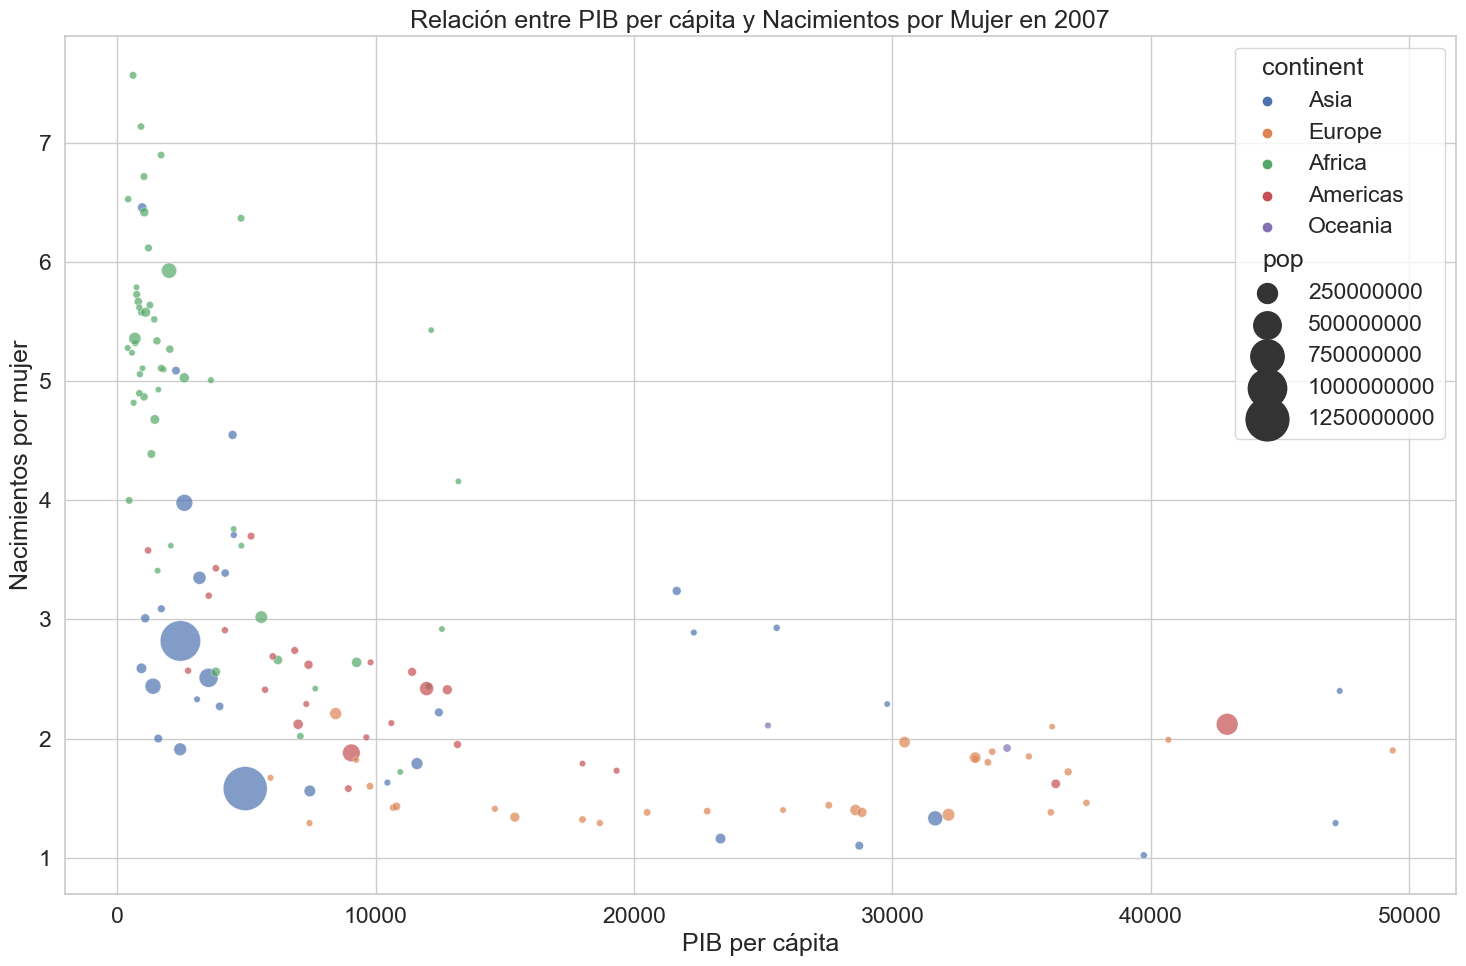

In [14]:

# Bubble chart
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') 

ax = sns.scatterplot(
    x='gdpPercap', 
    y='bornPerwom', 
    size='pop', 
    hue='continent', 
    data=df_2007, 
    sizes=(20, 1000),
    alpha=0.7,
    legend='brief'
)

ax.set(xlabel='PIB per cápita', ylabel='Nacimientos por mujer')
ax.set_title('Relación entre PIB per cápita y Nacimientos por Mujer en 2007')
plt.tight_layout()
plt.show()



# Pregunta  N°3

In [15]:
import plotly.express as px

fig = px.scatter(df2, 
                 x="gdpPercap", y="bornPerwom", 
                 animation_frame="year", animation_group="country",
                 size="pop", color="continent", 
                 hover_name="country", log_x=True, size_max=60,
                 title="Evolución de PIB vs Nacimientos por Mujer")
fig.show()


In [16]:
print(df.columns.tolist())


['ID Continent', 'Continent', 'ID Country', 'Country', 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


# Pregunta 4

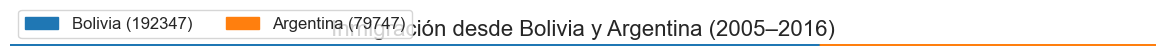

In [19]:

# Leer datos
df_migra = pd.read_excel("bbdd/MigrantesChile (2005-2016).xlsx")

# Convertir nombres de columnas a string (clave para el slicing)
df_migra.columns = df_migra.columns.map(str)

# Crear columna total sumando los años
df_migra['Total'] = df_migra.loc[:, '2005':'2016'].sum(axis=1)

# Filtrar solo países sudamericanos
sudamericanos = ['Argentina', 'Bolivia']
df_sud = df_migra[df_migra['Country'].isin(sudamericanos)]

# Agrupar y ordenar
df_total = df_sud.groupby('Country')['Total'].sum().sort_values(ascending=False)

from pywaffle import Waffle
import matplotlib.pyplot as plt

# Definir colores personalizados si quieres (opcional)
colors = ["#1f77b4", "#ff7f0e"]  # celeste y naranjo

fig = plt.figure(
    FigureClass=Waffle,
    rows=20,  # más filas = más espacio
    values=df_total,
    colors=colors,
    figsize=(12, 8),
    title={
        'label': 'Inmigración desde Bolivia y Argentina (2005–2016)',
        'loc': 'center',
        'fontsize': 16
    },
    labels=["{0} ({1})".format(k, v) for k, v in df_total.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': 2,
        'fontsize': 12
    }
)

plt.tight_layout()
plt.show()




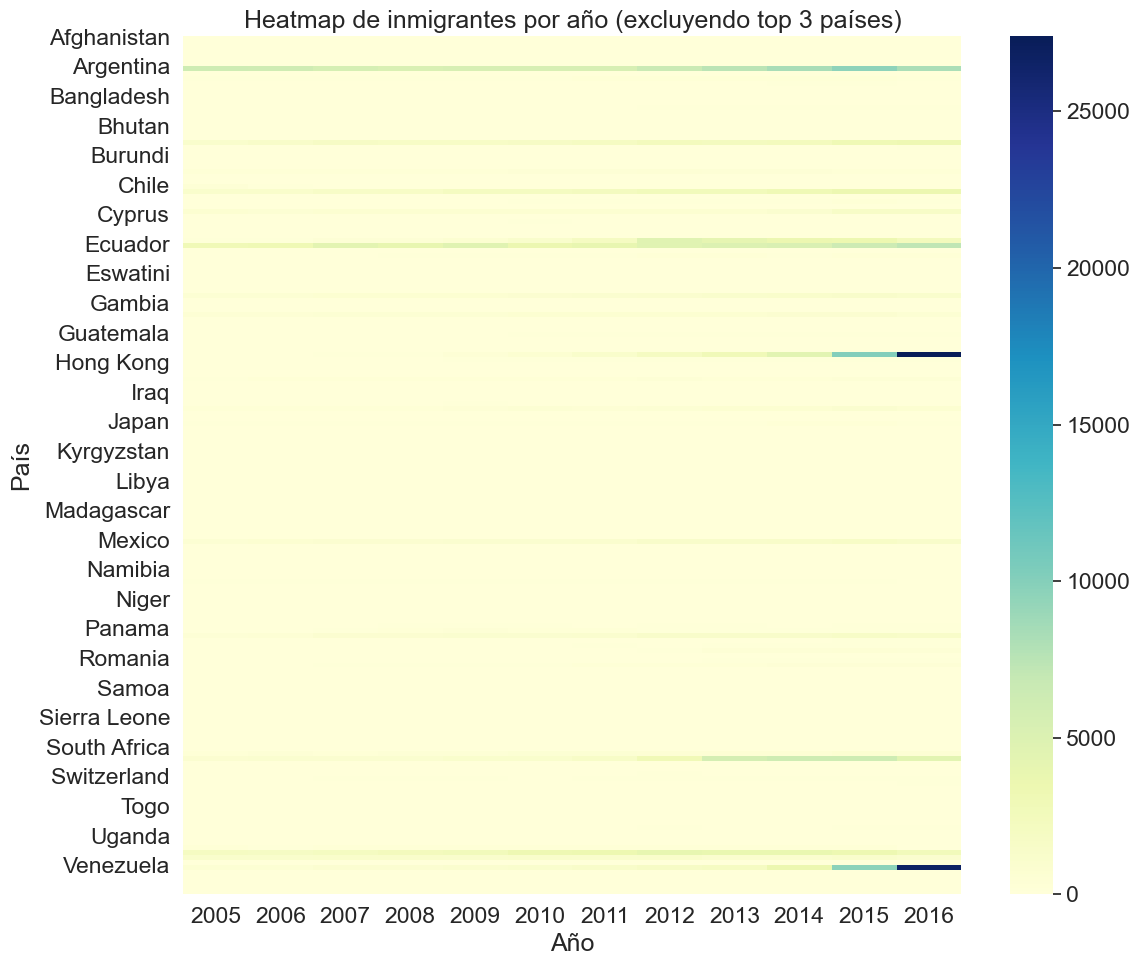

In [ ]:
# Transformar a formato largo
df_melt = df.melt(
    id_vars=["Country", "Continent"], 
    value_vars=list(range(2005, 2017)),
    var_name="year", 
    value_name="migrantes"
)
df_melt["year"] = df_melt["year"].astype(int)

# Sumar total por país
total_migrantes = df_melt.groupby("Country")["migrantes"].sum().sort_values(ascending=False)

# Excluir top 3
top_paises_excluidos = total_migrantes.index[:3]
restantes = total_migrantes.drop(top_paises_excluidos).index

# Filtrar
df_restantes = df_melt[df_melt["Country"].isin(restantes)]

# Pivotear
heat_data = df_restantes.pivot_table(index="Country", columns="year", values="migrantes", aggfunc="sum").fillna(0)

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(heat_data, cmap="YlGnBu")
plt.title("Heatmap de inmigrantes por año (excluyendo top 3 países)")
plt.xlabel("Año")
plt.ylabel("País")
plt.tight_layout()
plt.show()



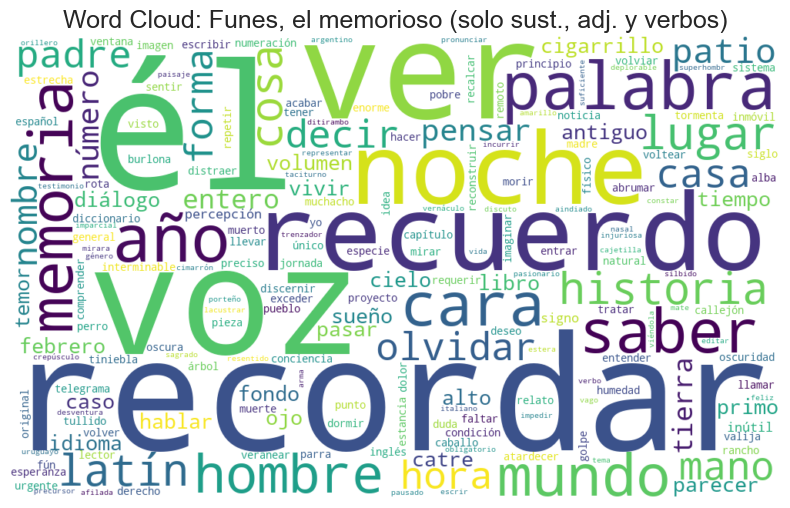

In [9]:
import requests
from wordcloud import WordCloud
import spacy

# Descargar texto
url = "https://gist.githubusercontent.com/jsdario/1daee22f3f13fe6bc6a343f829565759/raw/3511dc6de6a7bf064c168b4f20b85a20d8f83b91/funes_el_memorioso.txt"
texto = requests.get(url).text

# Procesar texto
nlp = spacy.load("es_core_news_sm")
doc = nlp(texto)

# Filtrar por POS
palabras_filtradas = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "ADJ", "VERB"] and not token.is_stop and token.is_alpha]

# Generar nube
text_filtrado = " ".join(palabras_filtradas)
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text_filtrado)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: Funes, el memorioso (solo sust., adj. y verbos)")
plt.show()
